In [1]:
spark.version

'3.5.3'

In [2]:
from pyspark.sql import SparkSession

# Create or get the existing Spark session
spark = (SparkSession.builder
         .appName("badanime")
         .getOrCreate())

# Verify Spark session
spark

25/10/01 21:26:31 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
df = spark.read.csv("hdfs:///data/AnimeList.csv",header=True,inferSchema=True)

# Show first 5 rows
df.show(5)

25/10/01 21:26:39 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+-------------------+--------------------+----------------------+--------------------+--------------------+----+--------+--------+---------------+------+--------------------+--------------------+---------------+--------------------+-----+---------+----+----------+-------+---------+--------------------+-----------+------------------+--------------------+--------------------+----------------+----------------+--------------------+--------------------+--------------------+
|anime_id|              title|       title_english|        title_japanese|      title_synonyms|           image_url|type|  source|episodes|         status|airing|        aired_string|               aired|       duration|              rating|score|scored_by|rank|popularity|members|favorites|          background|  premiered|         broadcast|             related|            producer|        licensor|          studio|               genre|       opening_theme|        ending_theme|
+--------+-------------------+----

In [4]:
df.limit(5).toPandas()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","""['""""Nirvana"""" by MUCC']""","""['#1: """"Nirvana"""" by MUCC (eps 1"
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,None,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","""['""""Romantic summer"""" by SUN&LUNAR']""","""['#1: """"Ashita e no Hikari (明日への光)"""" by Asuka..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,None,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",None,Satelight,"Comedy, Magic, School, Shoujo","""['#1: """"Minna no Tamago (みんなのたまご)"""" by Shugo ...","'#2: """"Shugo Shugo! (しゅごしゅご!)"""" by Shugo Char..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,None,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","""['""""Morning Grace"""" by Ritsuko Okazaki']""","""['""""Watashi No Ai Wa Chiisaikeredo"""" by Ritsu..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,None,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",None,J.C.Staff,"Comedy, Drama, Romance, Shounen","""['#1: """"Moshimo no Hanashi (もしもの話)"""" by nano....","'#2: """"23:40 (23時40分) feat. Base Ball Bear"""" ..."


In [4]:
df1 = spark.read.csv("hdfs:///data/UserAnimeList.csv",header=True,inferSchema=True)

# Show first 5 rows
df1.show(5)

+--------+--------+-------------------+-------------+--------------+--------+---------+-------------+----------------+---------------+-------+
|username|anime_id|my_watched_episodes|my_start_date|my_finish_date|my_score|my_status|my_rewatching|my_rewatching_ep|my_last_updated|my_tags|
+--------+--------+-------------------+-------------+--------------+--------+---------+-------------+----------------+---------------+-------+
|karthiga|      21|                586|   0000-00-00|    0000-00-00|       9|        1|         NULL|               0|     1362307973|   NULL|
|karthiga|      59|                 26|   0000-00-00|    0000-00-00|       7|        2|         NULL|               0|     1362923691|   NULL|
|karthiga|      74|                 26|   0000-00-00|    0000-00-00|       7|        2|         NULL|               0|     1367081015|   NULL|
|karthiga|     120|                 26|   0000-00-00|    0000-00-00|       7|        2|         NULL|               0|     1362308037|   NULL|

In [6]:
df1.limit(5).toPandas()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,None,0,1362307973,None
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,None,0,1362923691,None
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,None,0,1367081015,None
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,None,0,1362308037,None
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0,0,1364399953,None


In [7]:
# Show Count
print("Anime rows:", df.count(), "UserAnime rows:", df1.count())

Anime rows: 14478 UserAnime rows: 80298436


In [8]:
print("\nAnime schema:")
df.printSchema()
print("\nUserAnime schema:")
df1.printSchema()


Anime schema:
root
 |-- anime_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- title_english: string (nullable = true)
 |-- title_japanese: string (nullable = true)
 |-- title_synonyms: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- type: string (nullable = true)
 |-- source: string (nullable = true)
 |-- episodes: string (nullable = true)
 |-- status: string (nullable = true)
 |-- airing: string (nullable = true)
 |-- aired_string: string (nullable = true)
 |-- aired: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- score: string (nullable = true)
 |-- scored_by: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- members: integer (nullable = true)
 |-- favorites: string (nullable = true)
 |-- background: string (nullable = true)
 |-- premiered: string (nullable = true)
 |-- broadcast: string (nullable = true)
 |-- related: 

In [5]:
# Drop rows with missing ids
from pyspark.sql.functions import col, count, when, isnan, desc, split, explode, trim

df1 = df1.filter(col("username").isNotNull() & col("anime_id").isNotNull())
df = df.filter(col("anime_id").isNotNull())

In [6]:
# Cast IDs & rating to numeric
df = df.withColumn("anime_id", col("anime_id").cast("integer")) \
                     .withColumn("rating", col("rating").cast("double"))

df1 = df1.withColumn("anime_id", col("anime_id").cast("integer"))

In [7]:
# REmaning entities which are same in other dataframe
df1 = (
    df1
    .withColumnRenamed("username", "user_name")
    .withColumnRenamed("my_score", "user_score")
    .withColumnRenamed("my_watched_episodes", "user_watched_eps")
    .withColumnRenamed("my_start_date", "user_start_date")
    .withColumnRenamed("my_finish_date", "user_finish_date")
    .withColumnRenamed("my_status", "user_status")
    .withColumnRenamed("my_rewatching", "user_rewatching")
    .withColumnRenamed("my_rewatching_ep", "user_rewatching_ep")
    .withColumnRenamed("my_last_updated", "user_last_updated")
    .withColumnRenamed("my_tags", "user_tags")
)

In [8]:
# Keep only real user ratings
df = df.filter((col("score").isNotNull()) & (col("score") > 0))

print("Ratings dataset count:", df.count())
overlap = df.select("anime_id").intersect(df1.select("anime_id")).count()
print("Overlapping anime_ids:", overlap)

# Join datasets
anime_dataframe = df.join(df1, on="anime_id", how="inner")
print("Joined rows:", df.count())
print("Joined rows:", anime_dataframe.count())


Ratings dataset count: 14114


25/10/01 21:28:22 INFO PlanChangeLogger: 
 Dataproc Rule org.apache.spark.sql.catalyst.optimizer.ReplaceIntersectWithSemiJoin effective 1 times.



Overlapping anime_ids: 14114
Joined rows: 14114


25/10/01 21:28:57 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


Joined rows: 79485299


25/10/01 21:30:49 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 4 for reason Executor for container container_1759353757734_0001_01_000005 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 21:30:49 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 5 for reason Executor for container container_1759353757734_0001_01_000006 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 21:30:49 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 2 for reason Executor for container container_1759353757734_0001_01_000002 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.


In [10]:
anime_dataframe.cache()
anime_dataframe.count()

79485299

In [12]:
#stratified sampling wont bias training 
anime_sample = anime_dataframe.sample(withReplacement=False, fraction=0.01, seed=42)
anime_sample.count()

25/10/01 21:33:54 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


795559

In [10]:
from pyspark.sql.functions import col, count, when, isnan

nulls = anime_sample.select([
    count(when(col(c).isNull() | (col(c) == "") | isnan(col(c)), c)).alias(c)
    for c in anime_sample.columns
])
nulls.show(truncate=False)

25/10/01 21:32:42 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


+--------+-----+-------------+--------------+--------------+---------+----+------+--------+------+------+------------+-----+--------+------+-----+---------+-----+----------+-------+---------+----------+---------+---------+-------+--------+--------+------+-----+-------------+------------+---------+----------------+---------------+----------------+----------+-----------+---------------+------------------+-----------------+---------+
|anime_id|title|title_english|title_japanese|title_synonyms|image_url|type|source|episodes|status|airing|aired_string|aired|duration|rating|score|scored_by|rank |popularity|members|favorites|background|premiered|broadcast|related|producer|licensor|studio|genre|opening_theme|ending_theme|user_name|user_watched_eps|user_start_date|user_finish_date|user_score|user_status|user_rewatching|user_rewatching_ep|user_last_updated|user_tags|
+--------+-----+-------------+--------------+--------------+---------+----+------+--------+------+------+------------+-----+------

In [13]:
# Drop exact duplicate rows
anime_sample = anime_sample.dropDuplicates()

# If duplicates are only per (user_name, anime_id) → keep last score
from pyspark.sql import functions as f
from pyspark.sql.window import Window

anime_dataframe = (
    anime_sample
    .withColumn("row_num", f.row_number().over(
        Window.partitionBy("user_name","anime_id").orderBy(f.desc("user_last_updated"))
    ))
    .filter(col("row_num") == 1)
    .drop("row_num")
)

In [14]:
from pyspark.sql.functions import mean

# Drop rows with nulls in key columns
anime_sample = anime_sample.filter(
    col("user_name").isNotNull() & col("anime_id").isNotNull() & col("user_score").isNotNull()
)

# Compute means for all numeric columns in one go
numeric_cols = ["episodes", "members", "popularity", "score"]
mean_values = anime_sample.agg(*(mean(c).alias(c) for c in numeric_cols)).collect()[0].asDict()

# Fill all numeric columns at once
anime_sample = anime_sample.fillna(mean_values)

# Fill categorical columns at once
cat_cols = ["type", "genre", "source", "studio"]
fill_dict = {c: "Unknown" for c in cat_cols if c in anime_sample.columns}
anime_sample = anime_sample.fillna(fill_dict)


25/10/01 21:35:30 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:35:43 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 3 for reason Executor for container container_1759353757734_0001_01_000004 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 21:35:44 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 8 for reason Executor for container container_1759353757734_0001_01_000009 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 21:35:44 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 7 for reason Executor for container container_1759353757734_0001_01_000008 exited because of a 

25/10/01 21:37:10 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


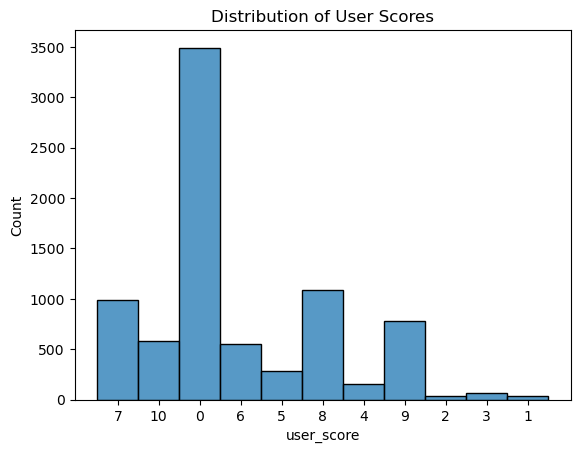

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_pd = anime_sample.select("user_score").dropna().sample(False, 0.01).toPandas()
sns.histplot(sample_pd["user_score"], bins=10)
plt.title("Distribution of User Scores")
plt.show()

In [16]:
import time

# Start timer
start_time = time.time()

# MapReduce-style Word Count using Spark RDD
titles_rdd = anime_sample.limit(1000).select("title").rdd.flatMap(lambda row: row[0].split(" "))

word_counts = (
    titles_rdd
    .map(lambda word: (word.lower(), 1))      # Map step
    .reduceByKey(lambda a, b: a + b)          # Reduce step
)

# Trigger action and measure duration
sample_output = word_counts.take(10)  # sample output
end_time = time.time()

# Print results
print("Sample word counts:", sample_output)
print(f"Execution time: {end_time - start_time:.2f} seconds")

25/10/01 21:38:02 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


Sample word counts: [('fruits', 2), ('basket', 4), ('ginga', 4), ('eiyuu', 3), ('densetsu:', 1), ('waga', 1), ('yuku', 1), ('wa', 27), ('hoshi', 3), ('no', 248)]
Execution time: 39.59 seconds


In [19]:
import time

# Start timer
start_time = time.time()


from pyspark.sql.functions import explode, split, lower

word_counts_df = (anime_sample.limit(1000)
    .select(explode(split(col("title"), " ")).alias("word"))
    .groupBy(lower(col("word")).alias("word"))
    .count()
    .orderBy("count", ascending=False))

word_counts_df.show(10)

end_time = time.time()

# Print results
print("Sample word counts:", sample_output)
print(f"Execution time: {end_time - start_time:.2f} seconds")

25/10/01 21:40:44 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


+------+-----+
|  word|count|
+------+-----+
|    no|  255|
|   the|   59|
|    to|   42|
|    ga|   36|
|    wa|   36|
|    ni|   27|
|season|   22|
|    of|   21|
| movie|   19|
|  love|   19|
+------+-----+
only showing top 10 rows

Sample word counts: [('fruits', 2), ('basket', 4), ('ginga', 4), ('eiyuu', 3), ('densetsu:', 1), ('waga', 1), ('yuku', 1), ('wa', 27), ('hoshi', 3), ('no', 248)]
Execution time: 35.76 seconds


In [21]:
from pyspark.sql.functions import when, split, explode, trim

# Binary label
clf_df = anime_sample.withColumn("label", when(col("user_score") >= 8, 1).otherwise(0))

# Ensure numeric types
numeric_cols = ["episodes","members","popularity","score"]
for c in numeric_cols:
    clf_df = clf_df.withColumn(c, col(c).cast("double"))

print("Schema after adding label and casting:")
clf_df.printSchema()

# Show sample rows
clf_df.select("user_name","anime_id","user_score","label","episodes","members","popularity","score","type").show(5, truncate=False)

Schema after adding label and casting:
root
 |-- anime_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- title_english: string (nullable = true)
 |-- title_japanese: string (nullable = true)
 |-- title_synonyms: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- type: string (nullable = false)
 |-- source: string (nullable = false)
 |-- episodes: double (nullable = true)
 |-- status: string (nullable = true)
 |-- airing: string (nullable = true)
 |-- aired_string: string (nullable = true)
 |-- aired: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- score: double (nullable = true)
 |-- scored_by: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- popularity: double (nullable = false)
 |-- members: double (nullable = true)
 |-- favorites: string (nullable = true)
 |-- background: string (nullable = true)
 |-- premiered: string (nullable = true)
 |-- broadcast: string (nulla

25/10/01 21:42:51 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 9 for reason Executor for container container_1759353757734_0001_01_000010 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 21:42:51 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 11 for reason Executor for container container_1759353757734_0001_01_000012 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 21:42:52 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 10 for reason Executor for container container_1759353757734_0001_01_000011 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 21:42:53 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the fu

+------------+--------+----------+-----+--------+--------+----------+-----+-------+
|user_name   |anime_id|user_score|label|episodes|members |popularity|score|type   |
+------------+--------+----------+-----+--------+--------+----------+-----+-------+
|ThePKNess   |26243   |0         |0    |12.0    |498439.0|83.0      |7.63 |TV     |
|Rideric     |35082   |0         |0    |1.0     |10656.0 |3576.0    |7.58 |Movie  |
|beshoyholmes|22789   |8         |1    |12.0    |327825.0|176.0     |8.47 |TV     |
|xtraclowny  |9618    |0         |0    |1.0     |30020.0 |2111.0    |6.89 |OVA    |
|RayderBlitz |5764    |9         |1    |1.0     |62585.0 |1296.0    |7.39 |Special|
+------------+--------+----------+-----+--------+--------+----------+-----+-------+
only showing top 5 rows



In [22]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler
from pyspark.ml import Pipeline

# Handle nulls first
clf_df_clean = clf_df.fillna({
    "episodes": 0,
    "members": 0,
    "popularity": 0,
    "score": 0,
    "type": "Unknown"
})

# Categorical handling
type_indexer = StringIndexer(inputCol="type", outputCol="type_index", handleInvalid="keep")
type_encoder = OneHotEncoder(inputCols=["type_index"], outputCols=["type_vec"], handleInvalid="keep")

# Assemble features
assembler = VectorAssembler(
    inputCols=["episodes","members","popularity","score","type_vec"],
    outputCol="features_raw",
    handleInvalid="keep"
)

# Scale features
scaler = StandardScaler(inputCol="features_raw", outputCol="features")

# Build pipeline
pipeline = Pipeline(stages=[type_indexer, type_encoder, assembler, scaler])

# Transform dataset
clf_ready = pipeline.fit(clf_df_clean).transform(clf_df_clean).select("features","label")
clf_ready.show(5, truncate=False)


25/10/01 21:44:19 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:44:20 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:44:58 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:45:35 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


+--------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                            |label|
+--------------------------------------------------------------------------------------------------------------------+-----+
|(12,[0,1,2,3,4],[0.6568755507642116,0.199519409849904,0.9073431758437936,1.7797000238033758,2.137638605514561])     |0    |
|(12,[0,1,2,3,4],[0.6316111065040496,5.576772618716811,0.001158064040643004,1.8292558356041961,2.137638605514561])   |0    |
|(12,[0,1,2,3,6],[0.050528888520323965,0.03230432646292526,2.365345803013336,1.4694375499199785,3.197340204519771])  |0    |
|(12,[0,1,2,3,6],[0.3284377753821058,0.16001332358803513,1.0532592449648122,1.7861638253426129,3.197340204519771])   |1    |
|(12,[0,1,2,3,8],[0.025264444260161983,0.010719765592558704,3.6525339841880347,1.3983357329883668,7.495393371852261])|0    |


25/10/01 22:13:23 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


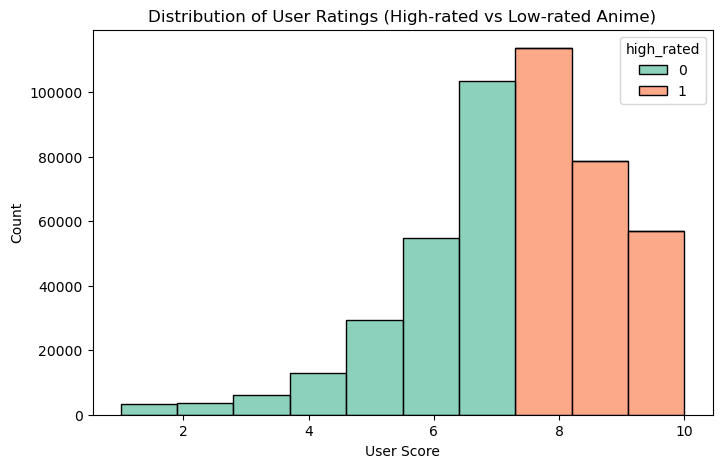

Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:65)


In [32]:
from pyspark.sql.functions import col, when

# Ensure numeric and filter out invalid 0 scores
anime_rated = anime_sample.withColumn(
    "user_score", col("user_score").cast("double")
).filter(col("user_score") > 0)

# Add high_rated label
anime_rated = anime_rated.withColumn(
    "high_rated", when(col("user_score") >= 8, 1).otherwise(0)
)

# Convert to Pandas for visualization
anime_rated_pd = anime_rated.select("user_score", "high_rated").toPandas()

# Plot again
plt.figure(figsize=(8,5))
sns.histplot(data=anime_rated_pd, x="user_score", hue="high_rated",
             multiple="stack", palette="Set2", bins=10)
plt.title("Distribution of User Ratings (High-rated vs Low-rated Anime)")
plt.xlabel("User Score")
plt.ylabel("Count")
plt.show()


25/10/01 22:14:30 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


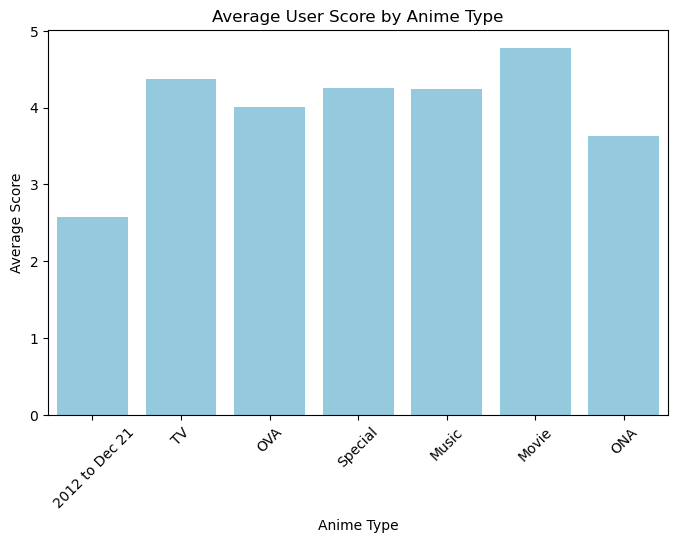

In [33]:
from pyspark.sql.functions import col

# Ensure numeric score
anime_type = anime_sample.withColumn("user_score", col("user_score").cast("double"))

# Group and compute average per type
anime_type_pd = anime_type.groupBy("type").avg("user_score").toPandas()

plt.figure(figsize=(8,5))
sns.barplot(x="type", y="avg(user_score)", data=anime_type_pd, color="skyblue")
plt.title("Average User Score by Anime Type")
plt.ylabel("Average Score")
plt.xlabel("Anime Type")
plt.xticks(rotation=45)
plt.show()


25/10/01 22:15:50 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
/tmp/ipykernel_3105/2523289863.py:14: FutureWarning:                            

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rating_class", y="episodes_num", data=anime_eps_pd, palette="Set2")


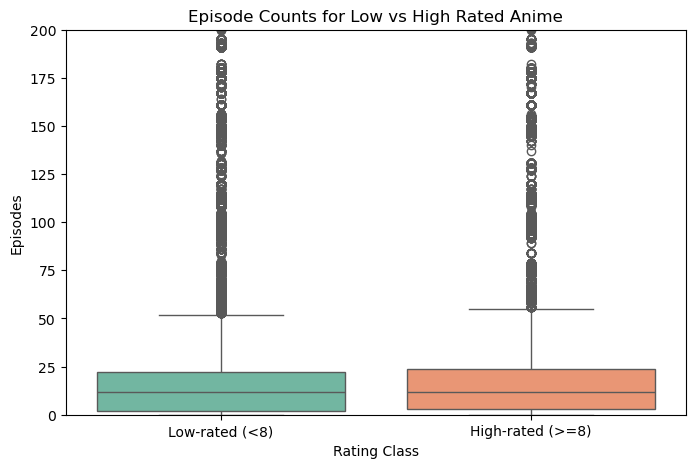

25/10/01 22:17:59 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 16 for reason Executor for container container_1759353757734_0001_01_000017 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 22:17:59 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 15 for reason Executor for container container_1759353757734_0001_01_000016 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 22:17:59 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 17 for reason Executor for container container_1759353757734_0001_01_000018 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.


In [34]:
from pyspark.sql.functions import regexp_replace

# Replace non-numeric with 0, then cast
anime_eps = anime_sample.withColumn(
    "episodes_num", regexp_replace(col("episodes"), "[^0-9]", "").cast("int")
).withColumn("user_score", col("user_score").cast("double"))

anime_eps_pd = anime_eps.select("episodes_num", "user_score").dropna().toPandas()

# Create high/low category
anime_eps_pd["rating_class"] = (anime_eps_pd["user_score"] >= 8).astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(x="rating_class", y="episodes_num", data=anime_eps_pd, palette="Set2")
plt.xticks([0,1], ["Low-rated (<8)", "High-rated (>=8)"])
plt.title("Episode Counts for Low vs High Rated Anime")
plt.ylabel("Episodes")
plt.xlabel("Rating Class")
plt.ylim(0, 200)  # clip long series for readability
plt.show()


25/10/01 22:37:36 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


                                                genre  high_rated_ratio
0                         'title': 'Wonderful Rush'}]          1.000000
1                                  Aniplex of America          1.000000
2                                      Hal Film Maker          1.000000
3        'title': 'Lupin III: Kutabare! Nostradamus'}          1.000000
4                                Ultra Super Pictures          1.000000
5   'title': 'Baka to Test to Shoukanjuu: Matsuri ...          1.000000
6                                 Walt Disney Studios          0.800000
7                                               GKIDS          0.800000
8                                     Half H.P Studio          0.714286
9                                            TV Tokyo          0.666667
10                                            Aniplex          0.666667
11                                             Dentsu          0.666667
12                                             Konami          0

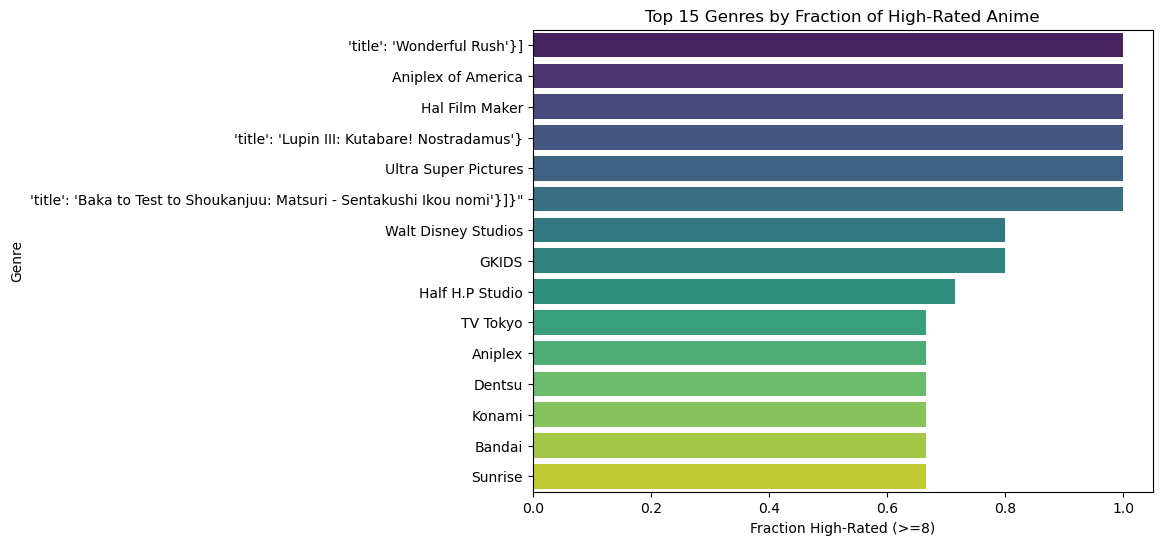

25/10/01 22:39:55 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 36 for reason Executor for container container_1759353757734_0001_01_000037 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 22:39:55 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 37 for reason Executor for container container_1759353757734_0001_01_000038 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
25/10/01 22:39:55 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 38 for reason Executor for container container_1759353757734_0001_01_000039 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.


In [43]:
from pyspark.sql import functions as F

# Use a sample for faster testing
cleaned = anime_sample.select("genre", "user_score").limit(5000)

# Split genres and explode
anime_genres = (cleaned
    .withColumn("genre", F.explode(F.split("genre", ", ")))
    .withColumn("genre", F.trim("genre"))
    .filter(F.col("genre") != "")
    .withColumn("high_rated", F.when(F.col("user_score") >= 8, 1).otherwise(0))
)

# Aggregate
genre_stats = (anime_genres.groupBy("genre")
    .agg(F.avg("high_rated").alias("high_rated_ratio"))
    .orderBy(F.col("high_rated_ratio").desc())
)

# Convert to pandas
genre_stats_pd = genre_stats.toPandas()
print(genre_stats_pd.head(15))

plt.figure(figsize=(8,6))
sns.barplot(
    data=genre_stats_pd.head(15),
    y="genre", x="high_rated_ratio",
    hue="genre", palette="viridis", legend=False
)
plt.title("Top 15 Genres by Fraction of High-Rated Anime")
plt.xlabel("Fraction High-Rated (>=8)")
plt.ylabel("Genre")
plt.show()


In [23]:
# Split into train and test sets
train, test = clf_ready.randomSplit([0.8, 0.2], seed=42)

print("Train rows:", train.count(), "Test rows:", test.count())


25/10/01 21:46:26 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:47:03 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


Train rows: 636472 Test rows: 159082


In [24]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Evaluators
auc_eval = BinaryClassificationEvaluator(metricName="areaUnderROC", labelCol="label")
f1_eval = MulticlassClassificationEvaluator(metricName="f1", labelCol="label")

# ---- Logistic Regression ----
lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=20)
lr_model = lr.fit(train)
lr_preds = lr_model.transform(test)

print("Logistic Regression AUC:", auc_eval.evaluate(lr_preds))
print("Logistic Regression F1 :", f1_eval.evaluate(lr_preds))

# ---- Random Forest ----
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, maxDepth=10)
rf_model = rf.fit(train)
rf_preds = rf_model.transform(test)

print("Random Forest AUC:", auc_eval.evaluate(rf_preds))
print("Random Forest F1 :", f1_eval.evaluate(rf_preds))


25/10/01 21:47:53 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:48:27 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:49:12 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:49:45 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:

Logistic Regression AUC: 0.6782907753998053


25/10/01 21:50:58 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


Logistic Regression F1 : 0.6347557933148813


25/10/01 21:51:34 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:52:08 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:52:45 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:53:42 WARN DAGScheduler: Broadcasting large task binary with size 1591.6 KiB
25/10/01 21:53:45 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
25/10/01 21:53:49 WARN DAGScheduler: Broadcasting large task binary with size 4.0 Mi

Random Forest AUC: 0.6777193843120652


25/10/01 21:55:42 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:56:15 WARN DAGScheduler: Broadcasting large task binary with size 1352.0 KiB


Random Forest F1 : 0.6309171811248807


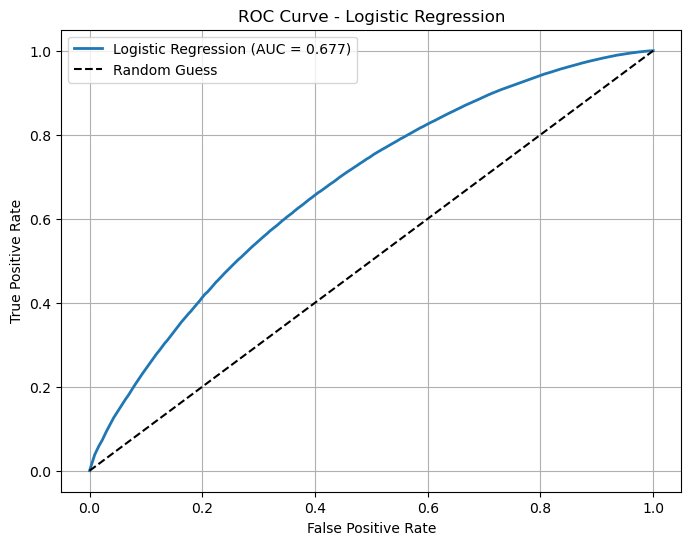

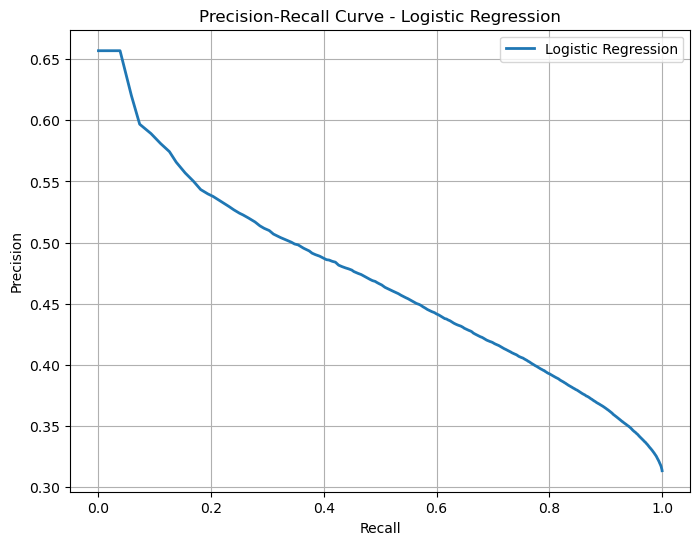

25/10/01 21:59:12 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 21:59:54 WARN DAGScheduler: Broadcasting large task binary with size 1336.4 KiB


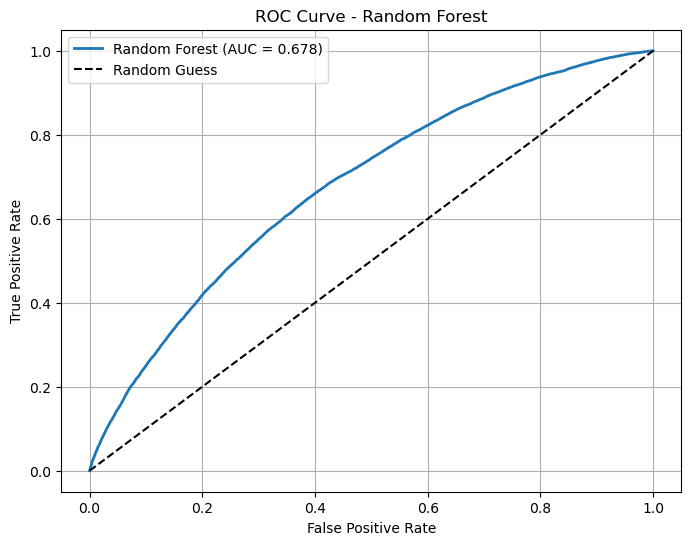

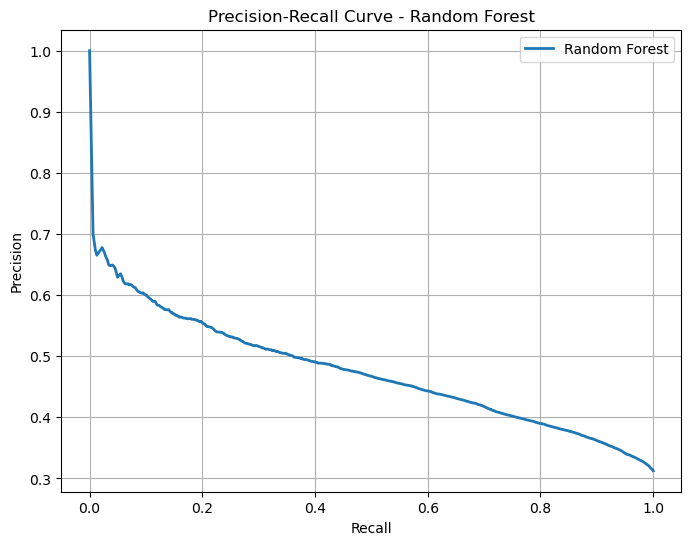

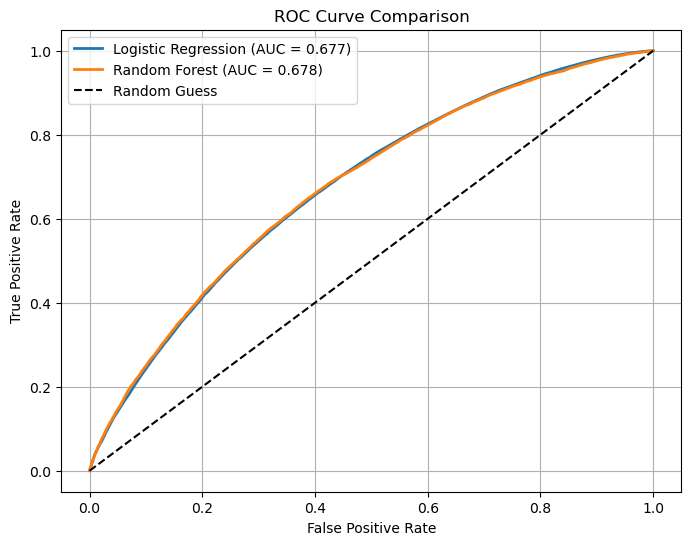

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# LOGISTIC REGRESSION VISUALIZATION

lr_summary = lr_model.summary

# ROC Curve
lr_roc = lr_summary.roc.toPandas()
lr_auc = lr_summary.areaUnderROC

plt.figure(figsize=(8,6))
plt.plot(lr_roc['FPR'], lr_roc['TPR'], label=f"Logistic Regression (AUC = {lr_auc:.3f})", linewidth=2)
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve 
lr_pr = lr_summary.pr.toPandas()
plt.figure(figsize=(8,6))
plt.plot(lr_pr['recall'], lr_pr['precision'], label="Logistic Regression", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.grid(True)
plt.legend()
plt.show()


# RANDOM FOREST VISUALIZATION
# Extract probabilities for class 1
rf_pd = rf_preds.select("label", "probability").toPandas()
rf_probs = rf_pd['probability'].apply(lambda x: float(x[1]))
rf_labels = rf_pd['label']

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(rf_labels, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})", linewidth=2)
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
rf_precision, rf_recall, _ = precision_recall_curve(rf_labels, rf_probs)

plt.figure(figsize=(8,6))
plt.plot(rf_recall, rf_precision, label="Random Forest", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.grid(True)
plt.legend()
plt.show()

# COMPARISON OF BOTH MODELS (ROC)

plt.figure(figsize=(8,6))
plt.plot(lr_roc['FPR'], lr_roc['TPR'], label=f"Logistic Regression (AUC = {lr_auc:.3f})", linewidth=2)
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})", linewidth=2)
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to array
importances = rf_model.featureImportances.toArray()
print("Raw importances array:", importances)

# Create DataFrame
feat_importances = pd.DataFrame({
    "Feature": [f"f{i}" for i in range(len(importances))],
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(feat_importances.head())


Raw importances array: [3.09383763e-02 1.94893651e-01 2.53027622e-01 4.84193023e-01
 1.51377732e-02 1.18431712e-02 7.18507346e-03 1.90084409e-03
 7.29034999e-04 1.51429927e-04 0.00000000e+00 0.00000000e+00]
  Feature  Importance
3      f3    0.484193
2      f2    0.253028
1      f1    0.194894
0      f0    0.030938
4      f4    0.015138


25/10/01 22:00:44 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:01:19 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


+--------------------+-----+-----------+------------+---------+----------+---------+---+---+---+---+---+---+---+
|            features|label|         f0|          f1|       f2|        f3|       f4| f5| f6| f7| f8| f9|f10|f11|
+--------------------+-----+-----------+------------+---------+----------+---------+---+---+---+---+---+---+---+
|(12,[0,1,2,3,4],[...|    0|0.050528888| 6.505617E-4|6.8621087| 1.1203923|2.1376386|0.0|0.0|0.0|0.0|0.0|0.0|0.0|
|(12,[0,1,2,3,4],[...|    0| 0.07579333|3.5221496E-4|7.7086535|0.98680705|2.1376386|0.0|0.0|0.0|0.0|0.0|0.0|0.0|
|(12,[0,1,2,3,4],[...|    0| 0.07579333|  0.06623299|1.7237784| 1.5297663|2.1376386|0.0|0.0|0.0|0.0|0.0|0.0|0.0|
|(12,[0,1,2,3,4],[...|    0| 0.07579333|  0.06623299|1.7237784| 1.5297663|2.1376386|0.0|0.0|0.0|0.0|0.0|0.0|0.0|
|(12,[0,1,2,3,4],[...|    0| 0.07579333|  0.06623299|1.7237784| 1.5297663|2.1376386|0.0|0.0|0.0|0.0|0.0|0.0|0.0|
+--------------------+-----+-----------+------------+---------+----------+---------+---+---+---+

25/10/01 22:01:55 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:03:07 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.


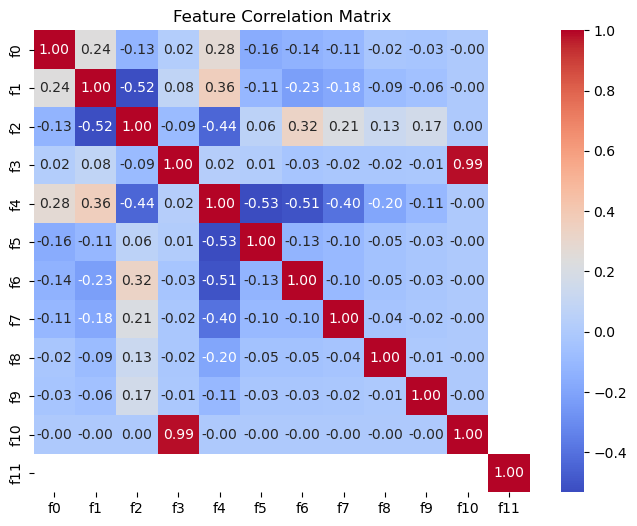

In [27]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Assume 'features' column is a Vector
num_features = len(train.select("features").first()[0])

# Create separate columns f0, f1, f2, ...
for i in range(num_features):
    get_i = udf(lambda v: float(v[i]), FloatType())
    train = train.withColumn(f"f{i}", get_i("features"))

train.show(5)

# Assemble feature columns into a vector again
feature_cols = [f"f{i}" for i in range(num_features)]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_vec")
train_vector = assembler.transform(train)

# Compute correlation matrix
corr_matrix = Correlation.corr(train_vector, "features_vec").head()[0].toArray()

# Convert to Pandas DataFrame for visualization
corr_df = pd.DataFrame(corr_matrix, columns=feature_cols, index=feature_cols)

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [28]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=200,        
    maxDepth=15,         
    minInstancesPerNode=1
)

rf_model = rf.fit(train)
print("New feature importances:", rf_model.featureImportances)


25/10/01 22:03:28 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:04:03 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:04:38 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:05:34 WARN DAGScheduler: Broadcasting large task binary with size 1025.4 KiB
25/10/01 22:05:39 WARN DAGScheduler: Broadcasting large task binary with size 1749.2 KiB
25/10/01 22:05:45 WARN DAGScheduler: Broadcasting large task binary with size 2.9

New feature importances: (12,[0,1,2,3,4,5,6,7,8,9],[0.03286233831667944,0.18916016366928506,0.22569011949180026,0.5218627071527944,0.011921998243812562,0.010238906067808744,0.00487706827581403,0.0021003295970314943,0.0009191189893203015,0.0003672501956538677])


25/10/01 22:09:06 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:09:38 WARN DAGScheduler: Broadcasting large task binary with size 1332.9 KiB


<Figure size 600x500 with 0 Axes>

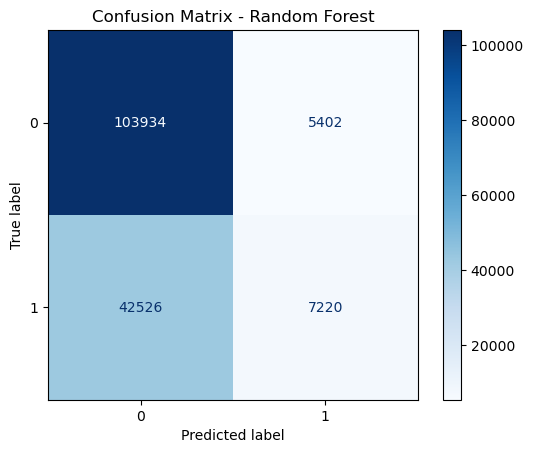

25/10/01 22:09:42 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.


<Figure size 600x500 with 0 Axes>

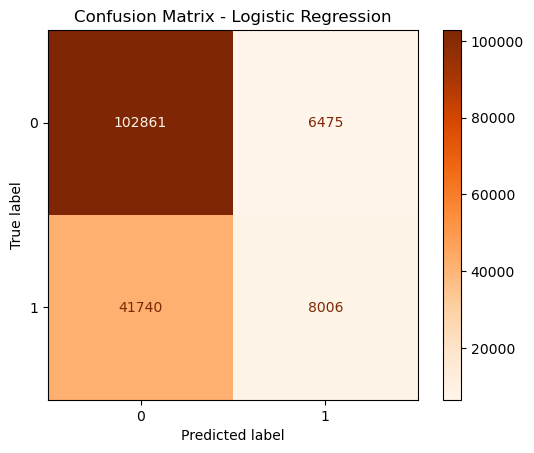

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example for Random Forest
rf_pd = rf_preds.select("label", "prediction").toPandas()

cm = confusion_matrix(rf_pd["label"], rf_pd["prediction"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

plt.figure(figsize=(6,5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Example for Logistic Regression
lr_pd = lr_preds.select("label", "prediction").toPandas()

cm_lr = confusion_matrix(lr_pd["label"], lr_pd["prediction"])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0,1])

plt.figure(figsize=(6,5))
disp_lr.plot(cmap=plt.cm.Oranges, values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


25/10/01 22:10:31 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:11:07 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:11:42 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the future. Please use the new key 'spark.executor.failuresValidityInterval' instead.
25/10/01 22:12:14 WARN DAGScheduler: Broadcasting large task binary with size 1340.7 KiB
25/10/01 22:12:17 WARN SparkConf: The configuration key 'spark.yarn.executor.failuresValidityInterval' has been deprecated as of Spark 3.5 and may be removed in the futur

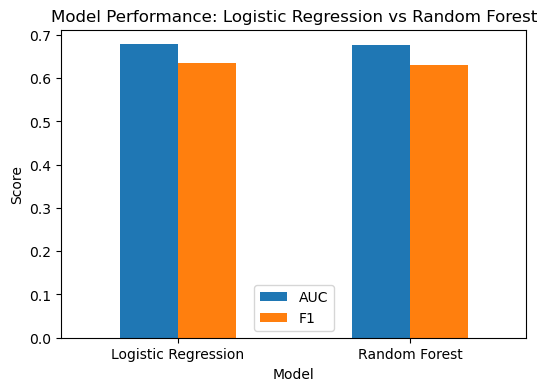

In [30]:
results = pd.DataFrame([
    {"Model":"Logistic Regression", "AUC": auc_eval.evaluate(lr_preds), "F1": f1_eval.evaluate(lr_preds)},
    {"Model":"Random Forest", "AUC": auc_eval.evaluate(rf_preds), "F1": f1_eval.evaluate(rf_preds)}
])

results.plot(x="Model", kind="bar", figsize=(6,4))
plt.title("Model Performance: Logistic Regression vs Random Forest")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

